In [2]:
import torch
from torch import nn
from torch.nn import functional as F
from torch.utils.data import DataLoader
from cereprocess.train.xloop import oneloop, get_datanpz, get_dataloaders
from cereprocess.train.misc import TrainElements, get_model_size, EarlyStopping, check_model, def_dev, def_hyp
from cereprocess.datasets.defaults import get_def_ds
from cereprocess.datasets.pytordataset import KFoldDataset
from cereprocess.datasets.pipeline import general_pipeline
from cereprocess.train.retrieve import load_picks, get_results                
from cereprocess.train.train import evaluate          
from cereprocess.train.callbacks import def_metrics       
from cereprocess.datasets.pytordataset import KFoldDataset
from models.neurogate import NeuroGATE
import pandas as pd
import numpy as np
import gc
import os

# Training

In [4]:
device = def_dev()
mins = 10
length = mins * 3000
input_size = (22, length)
tuh, nmt, nmt_4k = get_def_ds(mins)

In [5]:
# Change the dataset currently in use from over here
curr_data = nmt_4k

In [6]:

from cereprocess.datasets.getfiles import get_files
dataset_path = "F:\\NMT\\[M] nmt_scalp_eeg_dataset"

train, eval_ = get_files(dataset_path)

print("Train Normal:", len(train["normal"]))
print("Train Abnormal:", len(train["abnormal"]))
print("Eval Normal:", len(eval_["normal"]))
print("Eval Abnormal:", len(eval_["abnormal"]))



Train Normal: 80
Train Abnormal: 80
Eval Normal: 10
Eval Abnormal: 10


In [7]:

# Change pipeline from here
data_dir, data_description = get_datanpz(curr_data[0], curr_data[3], general_pipeline(dataset='NMT', length_minutes=mins), input_size)

Saving Data to Numpy Files
Converting train files
Total Pipelines: 1
Total Normal Files: 80
Total Abnormal Files: 80
Converting Normal Files


Processing Normal files:   0%|          | 0/80 [00:00<?, ?it/s]

Creating RawArray with float64 data, n_channels=22, n_times=57700
    Range : 0 ... 57699 =      0.000 ...  1153.980 secs
Ready.
Creating RawArray with float64 data, n_channels=22, n_times=60700
    Range : 0 ... 60699 =      0.000 ...  1213.980 secs
Ready.
Creating RawArray with float64 data, n_channels=22, n_times=43100
    Range : 0 ... 43099 =      0.000 ...   861.980 secs
Ready.
Creating RawArray with float64 data, n_channels=22, n_times=57900
    Range : 0 ... 57899 =      0.000 ...  1157.980 secs
Ready.
Creating RawArray with float64 data, n_channels=22, n_times=61200
    Range : 0 ... 61199 =      0.000 ...  1223.980 secs
Ready.
Creating RawArray with float64 data, n_channels=22, n_times=65400
    Range : 0 ... 65399 =      0.000 ...  1307.980 secs
Ready.
Creating RawArray with float64 data, n_channels=22, n_times=61600
    Range : 0 ... 61599 =      0.000 ...  1231.980 secs
Ready.
Creating RawArray with float64 data, n_channels=22, n_times=64400
    Range : 0 ... 64399 =      

Processing Abnormal files:   0%|          | 0/80 [00:00<?, ?it/s]

Creating RawArray with float64 data, n_channels=22, n_times=59400
    Range : 0 ... 59399 =      0.000 ...  1187.980 secs
Ready.
Creating RawArray with float64 data, n_channels=22, n_times=60000
    Range : 0 ... 59999 =      0.000 ...  1199.980 secs
Ready.
Creating RawArray with float64 data, n_channels=22, n_times=64800
    Range : 0 ... 64799 =      0.000 ...  1295.980 secs
Ready.
Creating RawArray with float64 data, n_channels=22, n_times=64400
    Range : 0 ... 64399 =      0.000 ...  1287.980 secs
Ready.
Creating RawArray with float64 data, n_channels=22, n_times=55800
    Range : 0 ... 55799 =      0.000 ...  1115.980 secs
Ready.
Creating RawArray with float64 data, n_channels=22, n_times=54000
    Range : 0 ... 53999 =      0.000 ...  1079.980 secs
Ready.
Creating RawArray with float64 data, n_channels=22, n_times=54000
    Range : 0 ... 53999 =      0.000 ...  1079.980 secs
Ready.
Creating RawArray with float64 data, n_channels=22, n_times=57300
    Range : 0 ... 57299 =      

Processing Normal files:   0%|          | 0/10 [00:00<?, ?it/s]

Creating RawArray with float64 data, n_channels=22, n_times=61200
    Range : 0 ... 61199 =      0.000 ...  1223.980 secs
Ready.
Creating RawArray with float64 data, n_channels=22, n_times=59400
    Range : 0 ... 59399 =      0.000 ...  1187.980 secs
Ready.
Creating RawArray with float64 data, n_channels=22, n_times=58700
    Range : 0 ... 58699 =      0.000 ...  1173.980 secs
Ready.
Creating RawArray with float64 data, n_channels=22, n_times=52800
    Range : 0 ... 52799 =      0.000 ...  1055.980 secs
Ready.
Creating RawArray with float64 data, n_channels=22, n_times=64600
    Range : 0 ... 64599 =      0.000 ...  1291.980 secs
Ready.
Creating RawArray with float64 data, n_channels=22, n_times=58500
    Range : 0 ... 58499 =      0.000 ...  1169.980 secs
Ready.
Converting Abnormal Files


Processing Abnormal files:   0%|          | 0/10 [00:00<?, ?it/s]

Creating RawArray with float64 data, n_channels=22, n_times=54500
    Range : 0 ... 54499 =      0.000 ...  1089.980 secs
Ready.
Creating RawArray with float64 data, n_channels=22, n_times=49200
    Range : 0 ... 49199 =      0.000 ...   983.980 secs
Ready.
Creating RawArray with float64 data, n_channels=22, n_times=55400
    Range : 0 ... 55399 =      0.000 ...  1107.980 secs
Ready.
Creating RawArray with float64 data, n_channels=22, n_times=45800
    Range : 0 ... 45799 =      0.000 ...   915.980 secs
Ready.
Creating RawArray with float64 data, n_channels=22, n_times=50000
    Range : 0 ... 49999 =      0.000 ...   999.980 secs
Ready.
Creating RawArray with float64 data, n_channels=22, n_times=49300
    Range : 0 ... 49299 =      0.000 ...   985.980 secs
Ready.
Creating RawArray with float64 data, n_channels=22, n_times=48100
    Range : 0 ... 48099 =      0.000 ...   961.980 secs
Ready.
CSV saved to results/nmt4k\data\data_processed\results0\eval\data.csv
CSV saved to results/nmt4k\

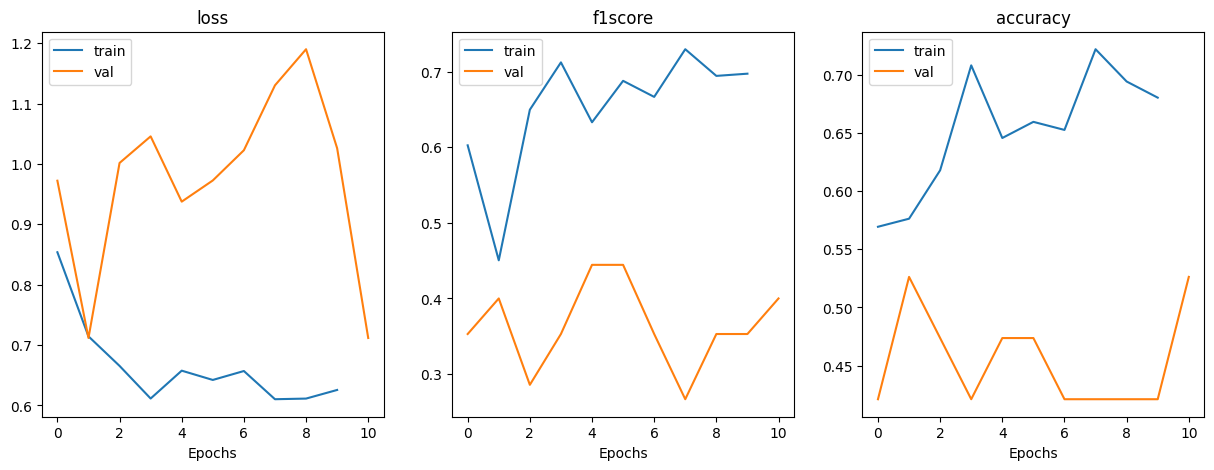


Printing Best:
Loss Wise:
Best Loss: 0.7116995503505071
{'loss': 0.7116995503505071, 'accuracy': 0.5263158082962036, 'precision': 0.5, 'recall': 0.3333333432674408, 'f1score': 0.4000000059604645, 'auroc': 0.5166666507720947, 'specificity': 0.699999988079071}
Best Accuracy: 0.5263158082962036
{'accuracy': 0.5263158082962036, 'precision': 0.5, 'recall': 0.3333333432674408, 'f1score': 0.4000000059604645, 'auroc': 0.5166666507720947, 'specificity': 0.699999988079071, 'loss': 0.7116995503505071}


38875

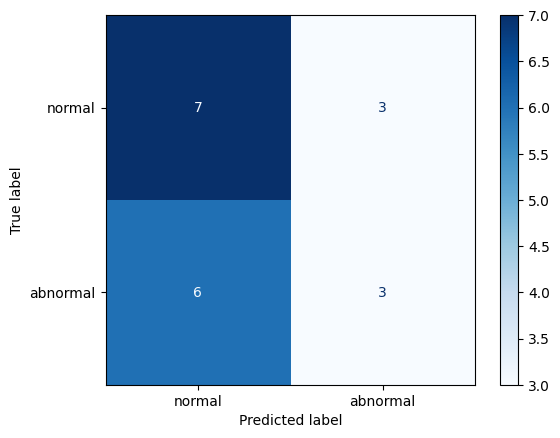

In [10]:
# Start training from here
# Set hyperparameters
seed=42
hyps = def_hyp(batch_size=8, epochs=10, lr=0.0003, accum_iter=1)
train_loader, eval_loader = get_dataloaders(data_dir, hyps['batch_size'], target_length=length,seed=seed)
# Set early stopping
es = EarlyStopping(patience=60) 
# Configure training
train_elems = TrainElements(device
, earlystopping=es
)
model = NeuroGATE().to(device)
name = f'NeuroGate'
model_x = oneloop(device, model, train_loader, eval_loader, data_description, hyps, train_elems, curr_data[3], name)
torch.cuda.empty_cache()
gc.collect()

# Evaluating a trained model

In [12]:
metrics = def_metrics(device)
model = NeuroGATE().to(device)
model.load_state_dict(torch.load("results/nmt4k/models/model_1.pt"))
train_elems = TrainElements(device)

In [16]:
length = 10 * 3000
hyps = def_hyp(batch_size=8, epochs=60, lr=0.0003, accum_iter=1)
train_loader, eval_loader = get_dataloaders(data_dir, hyps['batch_size'], target_length=length,seed=42)

In [17]:
evaluate(model, eval_loader, train_elems.criterion, device, metrics, train_elems.history, plot_roc=False)

D:\athar_code\venv\Lib\site-packages\torch\nn\functional.py:1538: UserWarning: dropout2d: Received a 3D input to dropout2d and assuming that channel-wise 1D dropout behavior is desired - input is interpreted as shape (N, C, L), where C is the channel dim. This behavior will change in a future release to interpret the input as one without a batch dimension, i.e. shape (C, H, W). To maintain the 1D channel-wise dropout behavior, please switch to using dropout1d instead.
  warnings.warn(


0.7116995503505071

In [18]:
train_elems.history.history

{'train': {},
 'val': {'accuracy': [0.5263158082962036, 0.5263158082962036],
  'precision': [0.5, 0.5],
  'recall': [0.3333333432674408, 0.3333333432674408],
  'f1score': [0.4000000059604645, 0.4000000059604645],
  'auroc': [0.5166666507720947, 0.5166666507720947],
  'specificity': [0.699999988079071, 0.699999988079071],
  'loss': [0.7116995503505071, 0.7116995503505071]}}

In [19]:
{key: value[-1] if isinstance(value, list) else value for key, value in history.history['val'].items()}

NameError: name 'history' is not defined

# Running K-Fold Training

EarlyStopping counter: 3 out of 10
Epoch 19/60 - Train Loss: 0.6254 - Val Loss: 0.3863
Train Accuracy: 0.7054 - Val Accuracy: 0.9333
Train F1 Score: 0.7246 - Val F1 Score: 0.9333

Printing Best:
Loss Wise:
Best Loss: 0.27367354879776634
{'loss': 0.27367354879776634, 'accuracy': 0.9333333373069763, 'precision': 1.0, 'recall': 0.8571428656578064, 'f1score': 0.9230769276618958, 'auroc': 0.9285714626312256, 'specificity': 1.0}
Best Accuracy: 0.9333333373069763
{'accuracy': 0.9333333373069763, 'precision': 0.875, 'recall': 1.0, 'f1score': 0.9333333373069763, 'auroc': 0.9375, 'specificity': 0.875, 'loss': 0.4321183145046234}


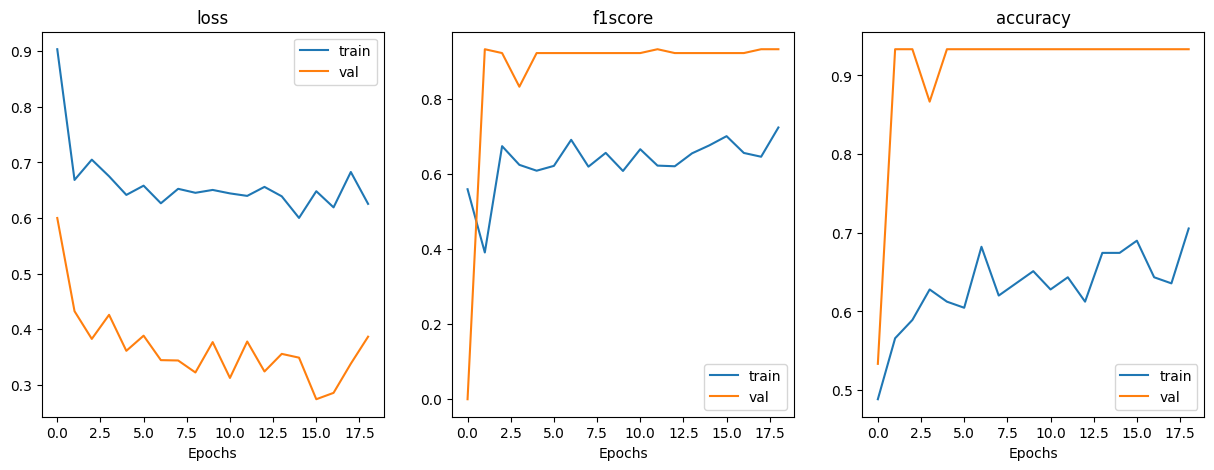

  0%|          | 0/17 [00:00<?, ?it/s]

KeyboardInterrupt: 

In [20]:
i = 1
for trainset, evalset in KFoldDataset(root_dir=data_dir, n_splits=10, shuffle=True):
    train_loader = DataLoader(trainset, batch_size=hyps["batch_size"], shuffle=True)
    eval_loader = DataLoader(evalset)
    model = NeuroGATE().to(device)
    train_elems = TrainElements(device)
    name = f'KFold-{i}'
    model_x = oneloop(device, model, train_loader, eval_loader, data_description, hyps, train_elems, curr_data[3], name)
    torch.cuda.empty_cache()
    gc.collect()
    i += 1

# Check Results

In [21]:
from train.retrieve import get_results, get_paths, load_picks
import pickle
from datasets.defaults import get_def_ds

ModuleNotFoundError: No module named 'train'

In [22]:
# Defining the dataset (This stores information for tuh and nmt, including the class weight balancing)
tuh, nmt, nmt_4k = get_def_ds(mins=mins)
current_selected = nmt_4k

In [23]:
res = get_results(current_selected[3], clean=True)

In [24]:
res.head()

,Model Name,Model Size,Model ID,Data ID,train_accuracy,train_precision,train_recall,train_f1score,train_auroc,train_specificity,train_loss,val_accuracy,val_precision,val_recall,val_f1score,val_auroc,val_specificity,val_loss,Best Val Accuracy,Best Val Loss
0,NeuroGate,515830,model_1,"eg_dataset_T[80, 80]_E[10, 10]_PMULTI_Pipeline...",0.6806,0.6625,0.7361,0.6974,0.6806,0.625,0.6256,0.5263,0.5,0.3333,0.4,0.5167,0.7,0.7117,0.5263,0.7117
